In [ ]:
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b?fbclid=IwAR1zkcTv6ddYAByvRlOonQPFtagcaM47aX_dyAMjAeNasW3Nr8BVaK-7zCU

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Loading data from bitcoin api

In [2]:
import requests, json
api = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000'
request = requests.get(api)
hist = pd.DataFrame(json.loads(request.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
hist.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2013-12-04,1237.55,1239.70,1131.35,1154.86,16296.85,19409766.71
2013-12-05,1106.35,1239.86,869.99,1237.55,58443.73,62292919.16
2013-12-06,845.02,1118.93,800.07,1106.35,53517.57,50747162.61
2013-12-07,697.02,895.96,576.03,845.02,97662.51,70727083.16
2013-12-08,803.96,828.96,653.03,697.02,31210.25,23044397.34


In [3]:
y = hist['close'].resample('MS').mean()

In [4]:
y['2017':]


time
2017-01-01      909.679355
2017-02-01     1061.324643
2017-03-01     1129.273871
2017-04-01     1215.241000
2017-05-01     1877.569677
2017-06-01     2632.285667
2017-07-01     2525.737097
2017-08-01     3878.901935
2017-09-01     4095.673000
2017-10-01     5351.401290
2017-11-01     7771.936000
2017-12-01    15034.531613
2018-01-01    12953.928710
2018-02-01     9410.401071
2018-03-01     9002.888710
2018-04-01     8042.367000
2018-05-01     8437.831613
2018-06-01     6777.438333
2018-07-01     7128.142903
2018-08-01     6688.295484
2018-09-01     6597.084000
2018-10-01     6479.654516
2018-11-01     5403.302667
2018-12-01     3713.890000
2019-01-01     3698.831613
2019-02-01     3690.753214
2019-03-01     3949.388387
2019-04-01     5167.444000
2019-05-01     7121.095926
Freq: MS, Name: close, dtype: float64

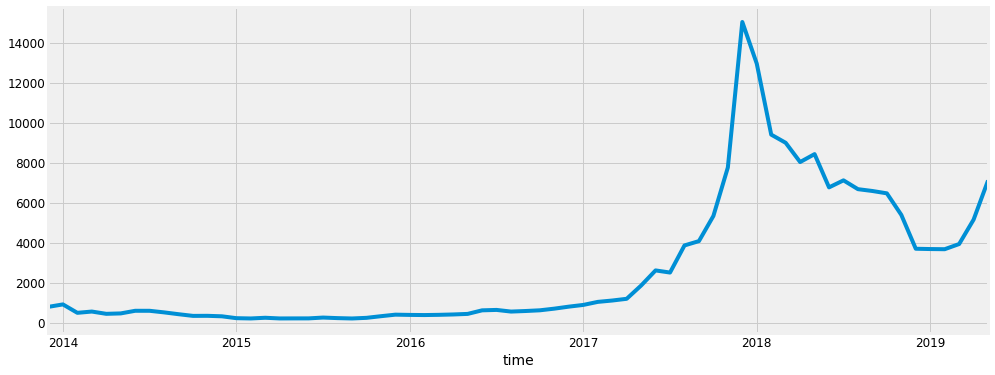

In [5]:

y.plot(figsize=(15, 6))
plt.show()

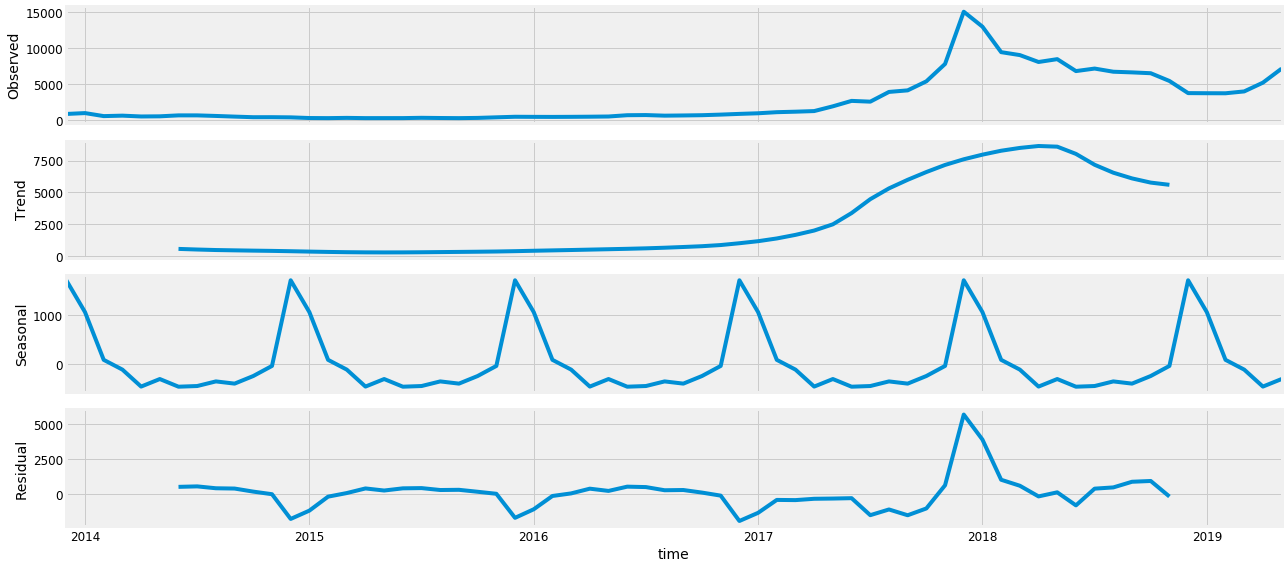

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1276.1577449932397
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1038.7640891904914
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1041.3185864972534
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:812.1155753533681
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1055.270962607293
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1026.8680081921736
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:830.587841212994
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:806.8663736278903
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1213.6194440860663
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:968.45134696638
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:985.2722141772838
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:754.2056654368783
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1002.2762342851809
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:967.7701079484183
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:788.9470699003507
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:751.0873353212816
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1092.4517549324903
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:898.9117044539521
ARIMA(

/Users/tobiaskarentiuskromanndahl/test_jupyter/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6711      0.401     -1.673      0.094      -1.457       0.115
ma.L1          0.8453      0.345      2.447      0.014       0.168       1.522
ar.S.L12      -1.2287      0.616     -1.994      0.046      -2.436      -0.021
sigma2      2.062e+06   2.43e+05      8.474      0.000    1.59e+06    2.54e+06


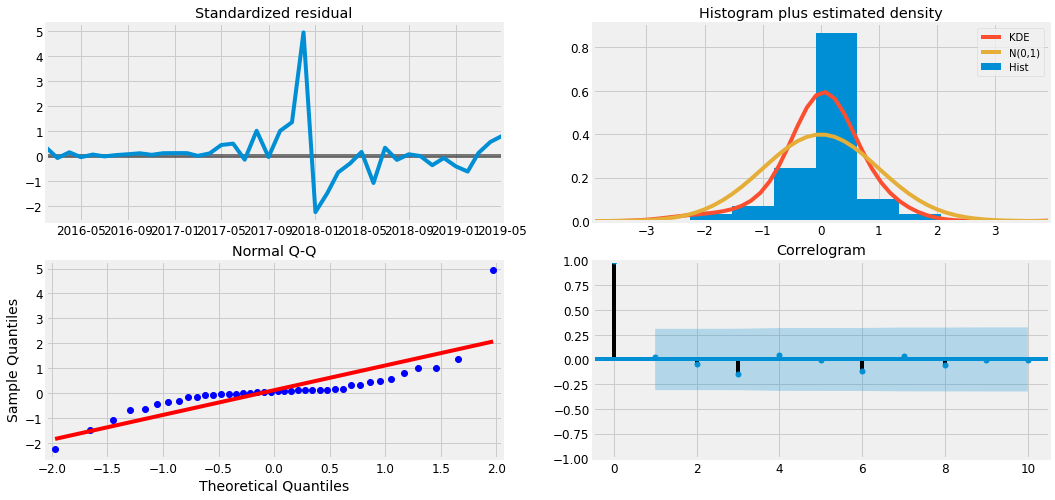

In [10]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

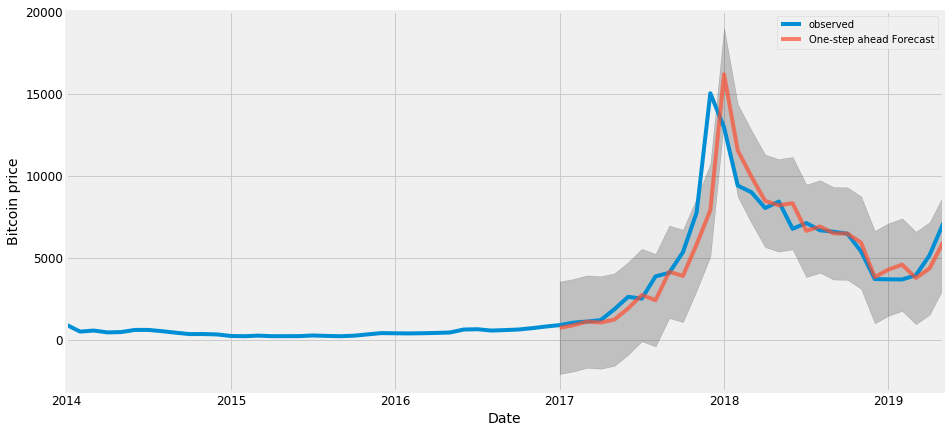

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')
plt.legend()

plt.show()

In [12]:
print(pred)
print('---------')
print(pred_ci)

---------
             lower close   upper close
time                                  
2017-01-01  -2068.950029   3561.649588
2017-02-01  -1915.525063   3714.721237
2017-03-01  -1689.489410   3940.504640
2017-04-01  -1746.952952   3882.860966
2017-05-01  -1567.308576   4062.376694
2017-06-01   -891.420173   4738.173208
2017-07-01    -70.966764   5558.560979
2017-08-01   -386.500775   5242.980079
2017-09-01   1343.729097   6973.176454
2017-10-01   1094.151681   6723.575108
2017-11-01   3015.667788   8645.074120
2017-12-01   5100.101624  10729.495742
2018-01-01  13376.510164  19005.895556
2018-02-01   8732.284796  14361.663953
2018-03-01   7136.910507  12766.285210
2018-04-01   5661.636835  11291.008357
2018-05-01   5390.388860  11019.758108
2018-06-01   5522.337049  11151.704672
2018-07-01   3839.593406   9468.959869
2018-08-01   4101.552989   9730.918623
2018-09-01   3685.236554   9314.601596
2018-10-01   3672.108420   9301.473039
2018-11-01   3122.561162   8751.925479
2018-12-01   10

# vi skal have undersøgt ded!!

In [13]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
# Undersøg dette
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2828941.84


In [14]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
# Og dette


The Root Mean Squared Error of our forecasts is 1681.95


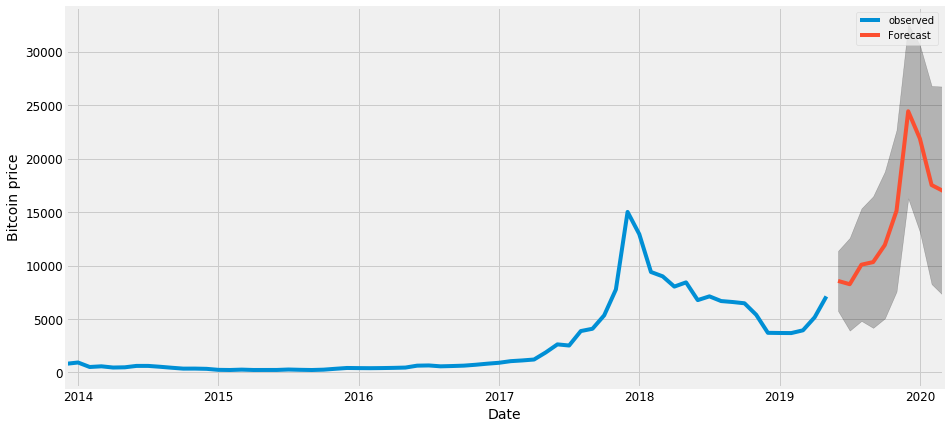

In [20]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')

plt.legend()
plt.show()

# STOR FED NÆSE